In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('paper')
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from statsmodels.tools.eval_measures import rmse

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.append('..')

In [4]:
from model_equations_separate_NC_sep_vmax import *


In [5]:
sns.set_context('talk')
sns.set_style('white')

In [6]:
# cdf = cdf1.loc[(cdf1.FL >= 0.2) & (cdf1.FCM >= 1e7) & cdf1.PRO.isin(['MED4'])]
cdf = pd.read_csv('fl_2_fcm_train_MED4.csv.gz')

In [7]:
X = cdf['FL']
y = cdf['FCM']
X.shape, y.shape
res = sm.OLS(y, sm.add_constant(X)).fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                    FCM   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     296.3
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           1.13e-26
Time:                        11:35:44   Log-Likelihood:                -1282.8
No. Observations:                  71   AIC:                             2570.
Df Residuals:                      69   BIC:                             2574.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.369e+07   3.24e+06      4.228      0.0

In [8]:
dt = res.get_prediction(sm.add_constant(cdf['FL'])).summary_frame(alpha = 0.05)
y_pred = dt['mean']
cdf['ypred'] = y_pred
cdf['error'] = np.absolute(cdf['ypred'] - cdf['FCM'])
cdf['error'] = cdf['ypred'] - cdf['FCM']
cdf['relerror'] = cdf['error'] / cdf['FCM']

In [9]:
cdf.nlargest(10, 'relerror')

,Unnamed: 0,FL,FCM,PRO,day,ypred,error,relerror
49,2,0.626,11213350.13,MED4,100.000000,3.004984e+07,1.883649e+07,1.679827
63,241,0.405,11810138.25,MED4,60.000000,2.427517e+07,1.246503e+07,1.055452
62,240,0.444,12621428.57,MED4,60.000000,2.529423e+07,1.267280e+07,1.004070
64,242,0.456,12794930.88,MED4,60.000000,2.560779e+07,1.281286e+07,1.001401
60,226,0.489,13987327.19,MED4,60.000000,2.647007e+07,1.248274e+07,0.892432
0,54,1.702,31400000.00,MED4,8.730000,5.816542e+07,2.676542e+07,0.852402
43,240,0.696,17592880.98,MED4,24.672222,3.187892e+07,1.428604e+07,0.812035
3,57,3.319,56109010.01,MED4,8.731250,1.004172e+08,4.430818e+07,0.789680
48,290,0.618,16945494.99,MED4,29.629167,2.984080e+07,1.289531e+07,0.760987
59,225,0.442,14562211.98,MED4,60.000000,2.524197e+07,1.067976e+07,0.733388


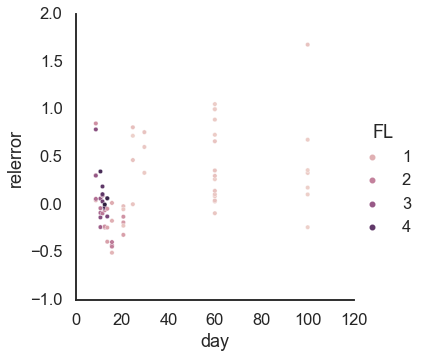

In [10]:
sns.relplot(data=cdf, x=cdf['day'], y=cdf['relerror'], hue='FL')

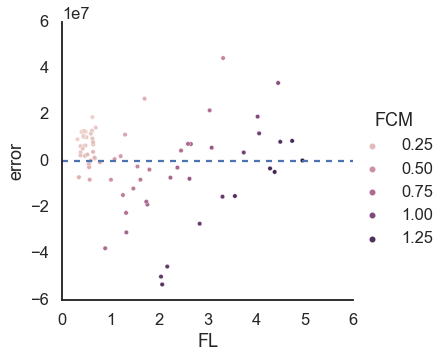

In [11]:
sns.relplot(data=cdf, x=cdf['FL'], y=cdf['error'], hue='FCM')
plt.axhline(0, ls='--')

<AxesSubplot:xlabel='FCM', ylabel='ypred'>

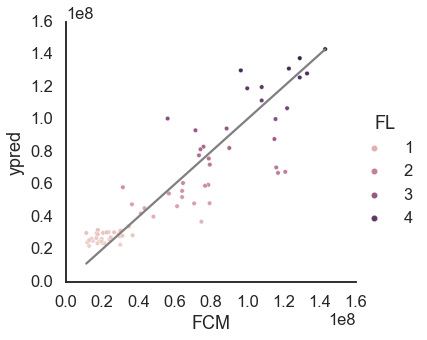

In [12]:
sns.relplot(data=cdf, x=cdf['FCM'], y=cdf['ypred'], hue='FL')
sns.lineplot(x=cdf['FCM'], y=cdf['FCM'],  color='grey', legend=False)

<AxesSubplot:xlabel='FL', ylabel='FCM'>

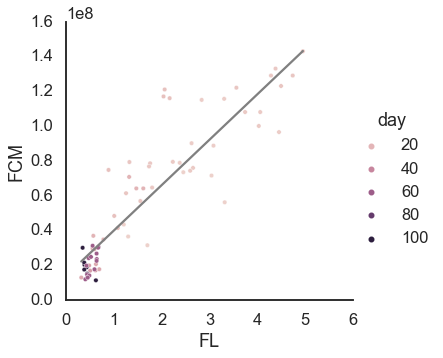

In [13]:
sns.relplot(data=cdf, x=cdf['FL'], y=cdf['FCM'], hue='day')
sns.lineplot(x=cdf['FL'], y=cdf['ypred'],  color='grey', legend=False)

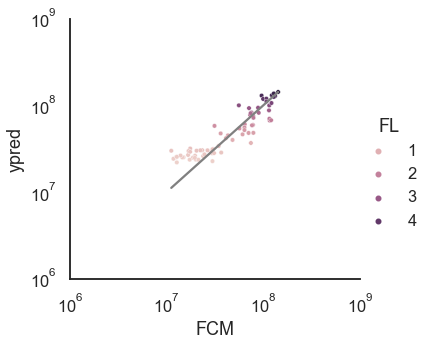

In [14]:
sns.relplot(data=cdf, x=cdf['FCM'], y=cdf['ypred'], hue='FL')
sns.lineplot(x=cdf['FCM'], y=cdf['FCM'],  color='grey', legend=False)
plt.yscale('log')
plt.xscale('log')


In [15]:
os.listdir('.')

['.ipynb_checkpoints',
 '10cc_fcm.csv.gz',
 '10cc_fl.csv.gz',
 'fl_2_fcm_train_MED4.csv.gz',
 'prepare_data_10cc_reference.ipynb',
 'refdf_10cc_1.csv.gz',
 'refdf_10cc_10.csv.gz',
 'refdf_10cc_11.csv.gz',
 'refdf_10cc_12.csv.gz',
 'refdf_10cc_13.csv.gz',
 'refdf_10cc_14.csv.gz',
 'refdf_10cc_15.csv.gz',
 'refdf_10cc_16.csv.gz',
 'refdf_10cc_17.csv.gz',
 'refdf_10cc_18.csv.gz',
 'refdf_10cc_19.csv.gz',
 'refdf_10cc_2.csv.gz',
 'refdf_10cc_20.csv.gz',
 'refdf_10cc_21.csv.gz',
 'refdf_10cc_22.csv.gz',
 'refdf_10cc_23.csv.gz',
 'refdf_10cc_24.csv.gz',
 'refdf_10cc_25.csv.gz',
 'refdf_10cc_26.csv.gz',
 'refdf_10cc_27.csv.gz',
 'refdf_10cc_28.csv.gz',
 'refdf_10cc_29.csv.gz',
 'refdf_10cc_3.csv.gz',
 'refdf_10cc_30.csv.gz',
 'refdf_10cc_4.csv.gz',
 'refdf_10cc_5.csv.gz',
 'refdf_10cc_6.csv.gz',
 'refdf_10cc_7.csv.gz',
 'refdf_10cc_8.csv.gz',
 'refdf_10cc_9.csv.gz',
 'ref_10cc.csv.gz']

In [16]:
fldf = pd.read_csv('10cc_fl.csv.gz',)
fcmdf = pd.read_csv('10cc_fcm.csv.gz',)


In [17]:
fldf

,Unnamed: 0,day,Sample,id,replicate,transfer,transfer day,heterotroph,full name,FL,Group
0,0,0,10A0,10,A,0,0.0,HOT5_F3,Marinovum 5F3,0.061,Inhibited Viable
1,6,0,10B0,10,B,0,0.0,HOT5_F3,Marinovum 5F3,0.070,Inhibited Viable
2,12,0,10C0,10,C,0,0.0,HOT5_F3,Marinovum 5F3,0.108,Inhibited Viable
3,18,0,11A0,11,A,0,0.0,HOT5_C3,Roseovarius 5C3,0.080,Inhibited
4,24,0,11B0,11,B,0,0.0,HOT5_C3,Roseovarius 5C3,0.084,Inhibited
...,...,...,...,...,...,...,...,...,...,...,...
2437,7384,129,8B0,8,B,0,0.0,mit0604,Prochlorococcus mit0604,NaN,NaN
2438,7385,129,8C0,8,C,0,0.0,mit0604,Prochlorococcus mit0604,NaN,NaN
2439,7386,129,9A0,9,A,0,0.0,k-12,E. coli,0.040,Inhibited Viable
2440,7387,129,9B0,9,B,0,0.0,k-12,E. coli,0.040,Inhibited Viable


In [18]:
dt = res.get_prediction(sm.add_constant(fldf['FL'])).summary_frame(alpha = 0.05)
fldf['cells/ml'] = dt['mean']
fldf.loc[(fldf['FL'] <0.2) | (fldf['cells/ml'] < 1e6),  'cells/ml'] = np.NaN

In [19]:
axenic = ['Axenic']

group1 = ['A. macleodii 1A3', 'Pseudoalteromonas haloplanktis',]

group2 = ['Sulfitobacter pseudonitzschiae','Ruegeria pomeroyi', ]
group3 = [ #'Prochlorococcus mit0604',
    'E. coli',
         'Marinovum 5F3',
       ]
group4 = ['Marinobacter adhaerens HP15',
       'Phaeobacter gallaeciensis', 'Roseovarius 5C3']

horder =  group1 + group2 + group3 + group4 + ['Axenic']
# ['Axenic', 'HOT1A3',  'CIP',  'nitzsch', 'mit0604',
#           'DSS-3','k-12','HOT5_F3', 'HOT5_C3'
#           'HP15', 'Pgall',
#          ]
gorder = ['Sustained', 'Strong', 'Inhibited Viable', 'Inhibited',   'Axenic',  ]
hpalette1 = sns.color_palette("Dark2", n_colors=len(group1)).as_hex() 
hpalette2 = sns.color_palette("terrain", n_colors=len(group2)).as_hex()  
hpalette3 = sns.color_palette("winter", n_colors=len(group3)+1).as_hex()[1:]  
hpalette4 = sns.color_palette("spring", n_colors=len(group4)).as_hex()

transfer_days = [20, 42, 60, 81, 129]
transfer_days = [42, 60, 81, 129]


hpalette =  hpalette1 + hpalette2 + hpalette3 + hpalette4 + ['black']
gpalette = [ hpalette[7], hpalette[1], hpalette[3], hpalette[5], hpalette[9],]
sns.color_palette(hpalette)


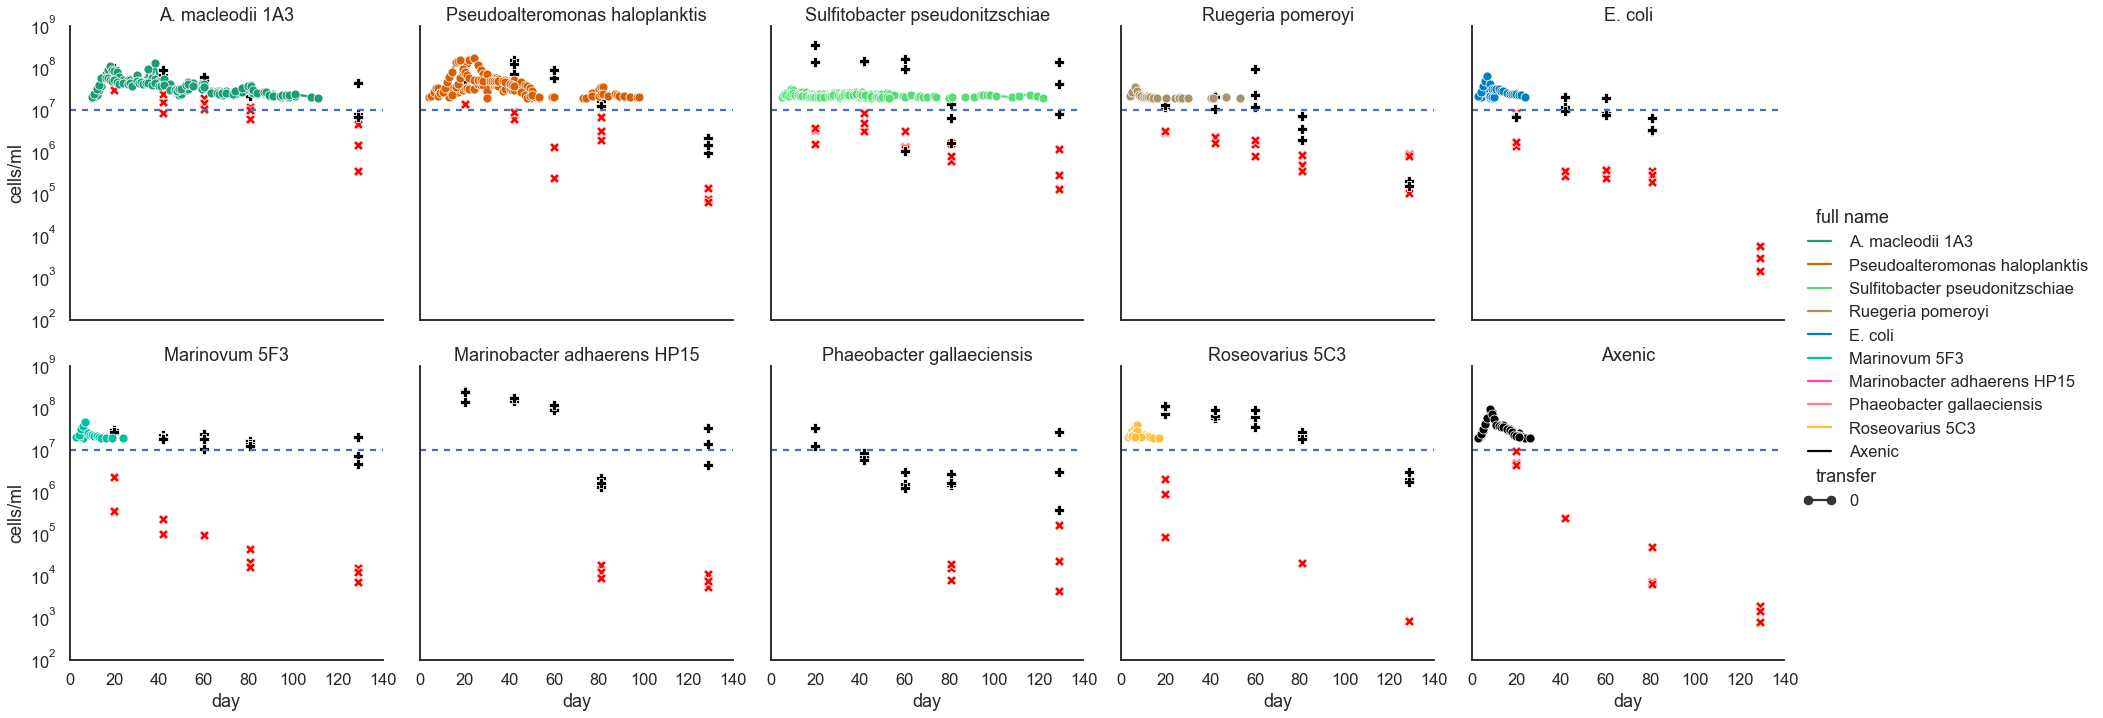

In [20]:
g = sns.relplot(
    data=fldf, x='day', y='cells/ml',
    kind='line', units='replicate', estimator=None,
    col='full name', hue='full name', col_order=horder,
    hue_order=horder, palette=hpalette, col_wrap=5, 
    style='transfer', markers=True, dashes=False,

).set(yscale='log',xlim=(0,140)).set_titles(row_template = '', col_template = '{col_name}')

for ax, name in zip(g.axes.flat, horder):
    sns.scatterplot(data=fcmdf.loc[fcmdf['full name'].isin([name]) & fcmdf.variable.isin(['med4 (FCM)'])],
                    x='transfer day', y='value', ax=ax, legend=False,
                    c=['red'], s=100, marker='X',
                   )
    sns.scatterplot(data=fcmdf.loc[fcmdf['full name'].isin([name]) & fcmdf.variable.isin(['het (FCM)'])],
                    x='transfer day', y='value', ax=ax, legend=False,
                    c=['black'], s=100, marker='P',
                   )

    ax.axhline(1e7, ls='--')


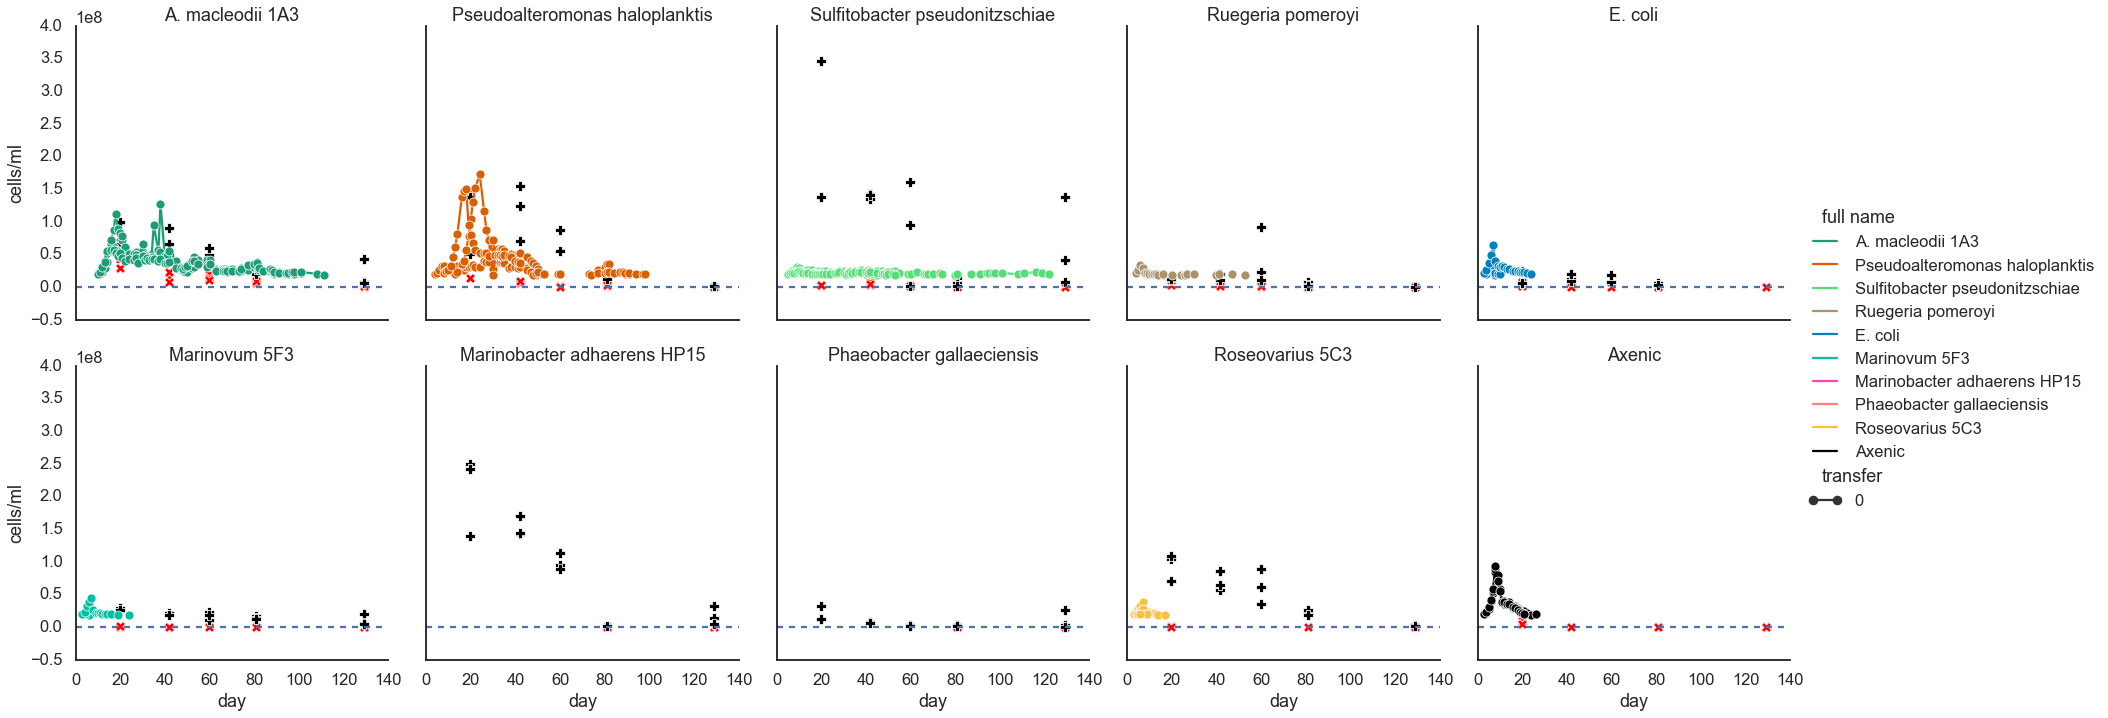

In [21]:
g = sns.relplot(
    data=fldf, x='day', y='cells/ml',
    kind='line', units='replicate', estimator=None,
    col='full name', hue='full name', col_order=horder,
    hue_order=horder, palette=hpalette, col_wrap=5, 
    style='transfer', markers=True, dashes=False,

).set(#yscale='log',
    xlim=(0,140)).set_titles(row_template = '', col_template = '{col_name}')

for ax, name in zip(g.axes.flat, horder):
    sns.scatterplot(data=fcmdf.loc[fcmdf['full name'].isin([name]) & fcmdf.variable.isin(['med4 (FCM)'])],
                    x='transfer day', y='value', ax=ax, legend=False,
                    c=['red'], s=100, marker='X',
                   )
    sns.scatterplot(data=fcmdf.loc[fcmdf['full name'].isin([name]) & fcmdf.variable.isin(['het (FCM)'])],
                    x='transfer day', y='value', ax=ax, legend=False,
                    c=['black'], s=100, marker='P',
                   )

    ax.axhline(0, ls='--')


In [22]:
fldf.head()

,Unnamed: 0,day,Sample,id,replicate,transfer,transfer day,heterotroph,full name,FL,Group,cells/ml
0,0,0,10A0,10,A,0,0.0,HOT5_F3,Marinovum 5F3,0.061,Inhibited Viable,NaN
1,6,0,10B0,10,B,0,0.0,HOT5_F3,Marinovum 5F3,0.070,Inhibited Viable,NaN
2,12,0,10C0,10,C,0,0.0,HOT5_F3,Marinovum 5F3,0.108,Inhibited Viable,NaN
3,18,0,11A0,11,A,0,0.0,HOT5_C3,Roseovarius 5C3,0.080,Inhibited,NaN
4,24,0,11B0,11,B,0,0.0,HOT5_C3,Roseovarius 5C3,0.084,Inhibited,NaN


In [23]:
fcmdf.tail()

,Unnamed: 0,tube,Sample,id,replicate,transfer,heterotroph,full name,date,transfer day,variable,value,transfer_success
268,25,NaN,7b,7,B,5.0,nitzsch,Sulfitobacter pseudonitzschiae,2021-08-29 15:49:00,128.984028,het (MPN),5000000.0,NaN
269,26,NaN,7c,7,C,5.0,nitzsch,Sulfitobacter pseudonitzschiae,2021-08-29 15:49:00,128.984028,het (MPN),500000.0,NaN
270,27,NaN,9a,9,A,5.0,k-12,E. coli,2021-08-29 15:49:00,128.984028,het (MPN),0.0,NaN
271,28,NaN,9b,9,B,5.0,k-12,E. coli,2021-08-29 15:49:00,128.984028,het (MPN),0.0,NaN
272,29,NaN,9c,9,C,5.0,k-12,E. coli,2021-08-29 15:49:00,128.984028,het (MPN),0.0,NaN


In [24]:
fldf.columns

Index(['Unnamed: 0', 'day', 'Sample', 'id', 'replicate', 'transfer',
       'transfer day', 'heterotroph', 'full name', 'FL', 'Group', 'cells/ml'],
      dtype='object')

In [25]:
fcmdf.columns

Index(['Unnamed: 0', 'tube', 'Sample', 'id', 'replicate', 'transfer',
       'heterotroph', 'full name', 'date', 'transfer day', 'variable', 'value',
       'transfer_success'],
      dtype='object')

In [26]:
fcmdf['day'] = fcmdf['transfer day']

In [27]:
fcmpdf = fcmdf.loc[fcmdf.variable.isin(['het (FCM)', 'med4 (FCM)'])].pivot(
    index=['Sample', 'id', 'replicate','heterotroph', 'full name','day'],
    columns=['variable'],
    values=['value']
).reset_index().rename(columns={
    ('value', 'het (FCM)') : 'cc het',
    ('value', 'med4 (FCM)') : 'cc med4',
})

fcmpdf.columns = ['Sample',
                     'id',
              'replicate',
            'heterotroph',
              'full name',
                    'day',
              'het (FCM)',
             'med4 (FCM)']
fcmpdf

,Sample,id,replicate,heterotroph,full name,day,het (FCM),med4 (FCM)
0,10A1,10,A,HOT5_F3,Marinovum 5F3,19.817361,2.524283e+07,3.315642e+05
1,10A2,10,A,HOT5_F3,Marinovum 5F3,41.843750,2.183200e+07,9.814324e+04
2,10A3,10,A,HOT5_F3,Marinovum 5F3,59.923611,1.030743e+07,NaN
3,10A4,10,A,HOT5_F3,Marinovum 5F3,80.893056,1.626928e+07,2.172097e+04
4,10A5,10,A,HOT5_F3,Marinovum 5F3,128.984028,1.973477e+07,1.561574e+04
...,...,...,...,...,...,...,...,...
139,9C1,9,C,k-12,E. coli,19.817361,2.420268e+07,8.151108e+06
140,9C2,9,C,k-12,E. coli,41.843750,1.961925e+07,3.567639e+05
141,9C3,9,C,k-12,E. coli,59.923611,1.893308e+07,3.600517e+05
142,9C4,9,C,k-12,E. coli,80.893056,3.268683e+06,1.859649e+05


In [28]:
fcmpdf.columns, fldf.columns

(Index(['Sample', 'id', 'replicate', 'heterotroph', 'full name', 'day',
        'het (FCM)', 'med4 (FCM)'],
       dtype='object'),
 Index(['Unnamed: 0', 'day', 'Sample', 'id', 'replicate', 'transfer',
        'transfer day', 'heterotroph', 'full name', 'FL', 'Group', 'cells/ml'],
       dtype='object'))

In [29]:
fcmpdf['cc het'] = fcmpdf['het (FCM)']* 1000
fcmpdf['cc med4'] = fcmpdf['med4 (FCM)']* 1000
fldf  ['cc med4'] = fldf['cells/ml']* 1000
fldf['cc het'] = np.NaN


In [30]:
columns = ['Sample', 'id', 'replicate', 'heterotroph', 'full name', 'day',
         'cc het', 'cc med4']

df = pd.concat([fcmpdf[columns], fldf[columns]])
 

In [31]:
df.head()

,Sample,id,replicate,heterotroph,full name,day,cc het,cc med4
0,10A1,10,A,HOT5_F3,Marinovum 5F3,19.817361,2.524283e+10,3.315642e+08
1,10A2,10,A,HOT5_F3,Marinovum 5F3,41.843750,2.183200e+10,9.814324e+07
2,10A3,10,A,HOT5_F3,Marinovum 5F3,59.923611,1.030743e+10,NaN
3,10A4,10,A,HOT5_F3,Marinovum 5F3,80.893056,1.626928e+10,2.172097e+07
4,10A5,10,A,HOT5_F3,Marinovum 5F3,128.984028,1.973477e+10,1.561574e+07


In [32]:

df['t'] = np.round(df['day']* seconds_in_day, decimals=0)

df['cc Bh[N]'] = df['cc het']* Qh
df['cc Bp[N]'] = df['cc med4']* Qp

df['cc Bh[C]'] = df['cc Bh[N]']* R_H
df['cc Bp[C]'] = df['cc Bp[N]']* R_P


In [33]:
df.Sample = df['id'].astype(str) + df['replicate']

In [34]:
df.columns

Index(['Sample', 'id', 'replicate', 'heterotroph', 'full name', 'day',
       'cc het', 'cc med4', 't', 'cc Bh[N]', 'cc Bp[N]', 'cc Bh[C]',
       'cc Bp[C]'],
      dtype='object')

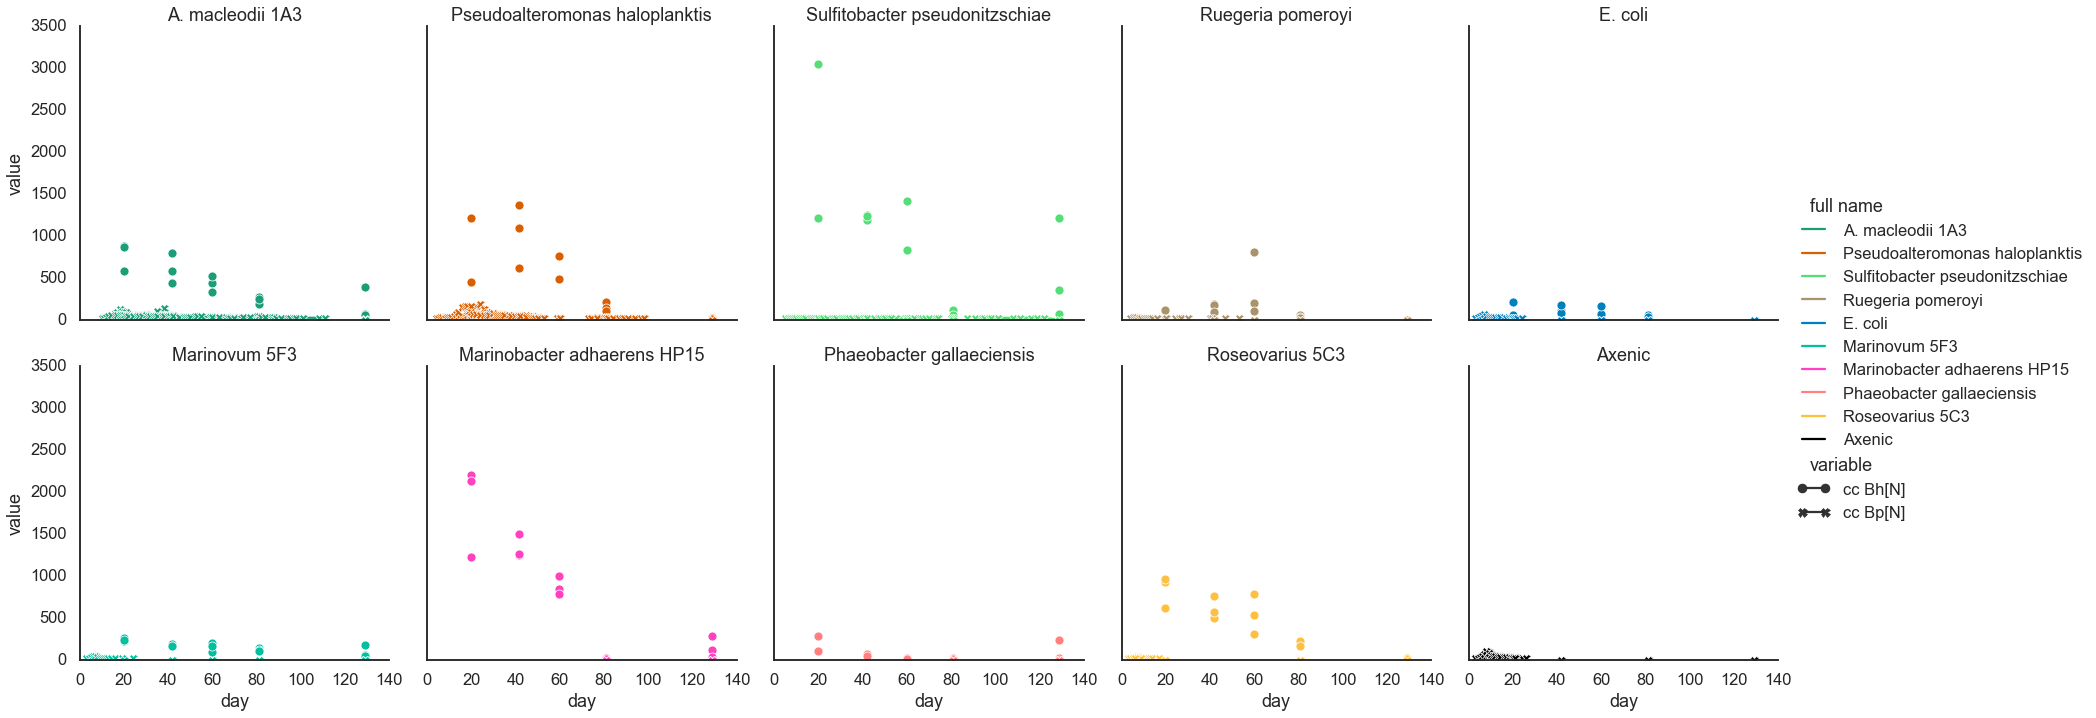

In [35]:

g = sns.relplot(
    data=df.melt(
        id_vars=['Sample', 'id', 'replicate', 'heterotroph', 'full name', 'day',], 
        value_vars=['cc Bh[N]', 'cc Bp[N]'],),
                 
    x='day', y='value',
    kind='line', units='replicate', estimator=None,
    col='full name', hue='full name', col_order=horder,
    hue_order=horder, palette=hpalette, col_wrap=5, 
    style='variable', markers=True, dashes=False,

#)#.set(#yscale='log',
#    xlim=(0,140)
).set_titles(row_template = '', col_template = '{col_name}')

# for ax, name in zip(g.axes.flat, horder):
#     sns.scatterplot(data=fcmdf.loc[fcmdf['full name'].isin([name]) & fcmdf.variable.isin(['med4 (FCM)'])],
#                     x='transfer day', y='value', ax=ax, legend=False,
#                     c=['red'], s=100, marker='X',
#                    )
#     sns.scatterplot(data=fcmdf.loc[fcmdf['full name'].isin([name]) & fcmdf.variable.isin(['het (FCM)'])],
#                     x='transfer day', y='value', ax=ax, legend=False,
#                     c=['black'], s=100, marker='P',
#                    )

#     ax.axhline(0, ls='--')


In [36]:
df.Sample.unique()

array(['10A', '10B', '10C', '11A', '11B', '11C', '1A', '1B', '1C', '2A',
       '2B', '2C', '3A', '3B', '3C', '4A', '4B', '4C', '5A', '5B', '5C',
       '6A', '6B', '6C', '7A', '7B', '7C', '9A', '9B', '9C', '8A', '8B',
       '8C'], dtype=object)

In [37]:
for i,s in enumerate(df.loc[~df['full name'].isin(['Axenic'])].Sample.unique()):
    print(i, s, f'refdf_{i+1}.csv.gz')
    df.loc[df.Sample.isin([s])].to_csv(f'refdf_10cc_{i+1}.csv.gz')

0 10A refdf_1.csv.gz
1 10B refdf_2.csv.gz
2 10C refdf_3.csv.gz
3 11A refdf_4.csv.gz
4 11B refdf_5.csv.gz
5 11C refdf_6.csv.gz
6 2A refdf_7.csv.gz
7 2B refdf_8.csv.gz
8 2C refdf_9.csv.gz
9 3A refdf_10.csv.gz
10 3B refdf_11.csv.gz
11 3C refdf_12.csv.gz
12 4A refdf_13.csv.gz
13 4B refdf_14.csv.gz
14 4C refdf_15.csv.gz
15 5A refdf_16.csv.gz
16 5B refdf_17.csv.gz
17 5C refdf_18.csv.gz
18 6A refdf_19.csv.gz
19 6B refdf_20.csv.gz
20 6C refdf_21.csv.gz
21 7A refdf_22.csv.gz
22 7B refdf_23.csv.gz
23 7C refdf_24.csv.gz
24 9A refdf_25.csv.gz
25 9B refdf_26.csv.gz
26 9C refdf_27.csv.gz
27 8A refdf_28.csv.gz
28 8B refdf_29.csv.gz
29 8C refdf_30.csv.gz


In [38]:
df.to_csv(f'ref_10cc.csv.gz')

In [42]:
fcmdf.loc[fcmdf.variable.isin(['het (FCM)']) & fcmdf['full name'].isin(['Sulfitobacter pseudonitzschiae'])].sort_values('value')

,Unnamed: 0,tube,Sample,id,replicate,transfer,heterotroph,full name,date,transfer day,variable,value,transfer_success,day
189,873,specimen_1_CC_001+sybr_Tube_030_058.fcs,7C3,7,C,3.0,nitzsch,Sulfitobacter pseudonitzschiae,2021-06-21 14:22:00,59.923611,het (FCM),1.062295e+06,True,59.923611
219,908,"specimen_2_CC+sybr_1,3a,100_Tube_007_198.fcs",7C4,7,C,4.0,nitzsch,Sulfitobacter pseudonitzschiae,2021-07-12 13:38:00,80.893056,het (FCM),1.644497e+06,True,80.893056
217,906,"specimen_2_CC+sybr_1,3a,100_Tube_005_196.fcs",7B4,7,B,4.0,nitzsch,Sulfitobacter pseudonitzschiae,2021-07-12 13:38:00,80.893056,het (FCM),6.235946e+06,True,80.893056
240,936,specimen_3_CC+sybr_Tube_030_189.fcs,7C5,7,C,5.0,nitzsch,Sulfitobacter pseudonitzschiae,2021-08-29 15:49:00,128.984028,het (FCM),7.958582e+06,False,128.984028
215,904,"specimen_2_CC+sybr_1,3a,100_Tube_003_194.fcs",7A4,7,A,4.0,nitzsch,Sulfitobacter pseudonitzschiae,2021-07-12 13:38:00,80.893056,het (FCM),1.347268e+07,True,80.893056
232,926,specimen_3_CC+sybr_Tube_019_178.fcs,7B5,7,B,5.0,nitzsch,Sulfitobacter pseudonitzschiae,2021-08-29 15:49:00,128.984028,het (FCM),4.074632e+07,True,128.984028
172,855,specimen_1_CC_001+sybr_Tube_008_038.fcs,7A3,7,A,3.0,nitzsch,Sulfitobacter pseudonitzschiae,2021-06-21 14:22:00,59.923611,het (FCM),9.455738e+07,True,59.923611
151,832,specimen_2_CC+sybr_Tube_023_114.fcs,7B2,7,B,2.0,nitzsch,Sulfitobacter pseudonitzschiae,2021-06-03 12:27:00,41.843750,het (FCM),1.352149e+08,True,41.843750
224,916,specimen_3_CC+sybr_Tube_008_167.fcs,7A5,7,A,5.0,nitzsch,Sulfitobacter pseudonitzschiae,2021-08-29 15:49:00,128.984028,het (FCM),1.371350e+08,True,128.984028
125,805,specimen_1_CC_001+sybr_Tube_023_052.fcs,7B1,7,B,1.0,nitzsch,Sulfitobacter pseudonitzschiae,2021-05-12 11:49:00,19.817361,het (FCM),1.372224e+08,True,19.817361
